<a href="https://colab.research.google.com/github/frferreira/Ifes-RedesNeurais/blob/main/local_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        

#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '/content/drive/MyDrive/Academico/Mestrado/RedeNeurais/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')


mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(train_images, train_labels), (test_images, test_labels) = mnist_dataloader.load_data()



In [12]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [13]:
train_images.shape, len(train_labels), train_labels

((60000, 28, 28), 60000, array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

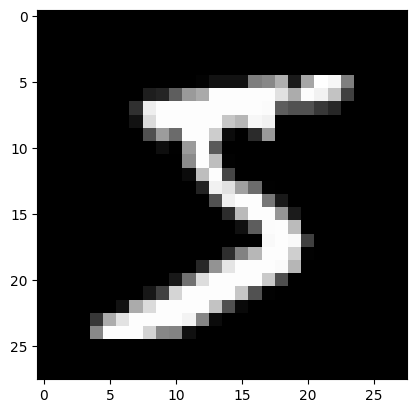

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.show()

In [15]:
test_images.shape, len(test_labels), test_labels

((10000, 28, 28), 10000, array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [17]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [18]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [19]:
(train_images.shape, train_labels), (test_images.shape, test_labels)

(((60000, 784), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)),
 ((10000, 784), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)))

In [20]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2632 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1079 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0704 - accuracy: 0.9784
Epoch 4/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0514 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0389 - accuracy: 0.9883


In [21]:
predicted = model.predict(test_images[0:1])
predicted[0]

1/1 [==============================] - 0s 92ms/step


array([1.3155294e-08, 1.3487975e-09, 7.2344187e-06, 3.1322063e-06,
       2.4551612e-11, 1.5960044e-08, 3.9957870e-13, 9.9998939e-01,
       4.2237769e-08, 1.8965034e-07], dtype=float32)

In [22]:
predicted[0].argmax()

7

In [23]:
predicted[0][7]

0.9999894

In [24]:
test_labels[0]

7

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0700 - accuracy: 0.9788
test_acc: 0.9787999987602234


In [26]:
from tensorflow.keras.utils import to_categorical
train_labels_hot = to_categorical(train_labels)
test_labels_hot = to_categorical(test_labels)

In [27]:
from keras.utils.sidecar_evaluator import optimizer
from prompt_toolkit.shortcuts.progress_bar.base import E
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(y.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    return np.array([(a == np.max(a)) for a in probabilities])

modelo = RedeNeural()
modelo.fit(train_images, train_labels_hot)
ypred = modelo.predict(test_images)
accuracy_score(test_labels_hot, ypred)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2619 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1052 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0697 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0514 - accuracy: 0.9845
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


0.9807

In [28]:
from keras.utils.sidecar_evaluator import optimizer
from prompt_toolkit.shortcuts.progress_bar.base import E
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

modelo = RedeNeural()
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2669 - accuracy: 0.9227
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1080 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0705 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0506 - accuracy: 0.9845
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


0.9815

In [29]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [30]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

modelo = Pipeline([
    ("scaler", MinMaxScaler()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2637 - accuracy: 0.9241
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1076 - accuracy: 0.9678
Epoch 3/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0704 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0518 - accuracy: 0.9847
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


0.9796

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.astype("float32") / 255

from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2617 - accuracy: 0.9237
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1053 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0696 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0504 - accuracy: 0.9850
Epoch 5/5
313/313 [==============================] - 1s 3ms/step


0.9807

In [33]:
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(train_images, train_labels), (test_images, test_labels) = mnist_dataloader.load_data()

In [34]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [35]:
from keras.utils.sidecar_evaluator import optimizer
from prompt_toolkit.shortcuts.progress_bar.base import E
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Conv2D(4, 4, activation='relu'),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1,28,28,1))

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("reshape", MudaShape()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 31s 64ms/step - loss: 0.2243 - accuracy: 0.9306
Epoch 2/5
469/469 [==============================] - 31s 66ms/step - loss: 0.0701 - accuracy: 0.9781
Epoch 3/5
469/469 [==============================] - 31s 66ms/step - loss: 0.0411 - accuracy: 0.9871
Epoch 4/5
469/469 [==============================] - 30s 65ms/step - loss: 0.0275 - accuracy: 0.9914
Epoch 5/5
313/313 [==============================] - 2s 7ms/step


0.9859